---
title: "Supervised Learning"
format:
    html: 
        code-fold: false
---

# Brief Introuduction 

In this section, we will explore various supervised learning models, categorized into three primary types: Regression, Multiclass Classification, and Binary Classification. Each subsection will dive deeper into selecting specific features and targets from our dataset to address our data science questions futher. This process will guide our model training and enhance the accuracy of predictions by uncovering valuable patterns in the data. 

In [286]:
#these are all the necessary packages to run all the codes below 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency
from sklearn.feature_selection import RFE

# Data Preprocessing 

Data preprocessing is a crucial step in supervised learning. It involves cleaning, normalizing or standardizing data, and performing feature selection to ensure the training of accurate models while improving efficiency throughout the process.

Specifically, we standardize the data because much of it is numerical, and standardization makes it easier for machine learning algorithms, such as logistic regression, to perform effectively. Standardization scales the data to have a mean of 0 and a standard deviation of 1, ensuring that all features contribute equally during model training. Additionally, we encode categorical variables because most machine learning models cannot directly handle non-numerical data. By encoding these variables into numerical formats, we make them interpretable by the models.

Feature selection is another vital aspect of preprocessing. We utilize correlation tests, chi-squared tests, and Recursive Feature Elimination (RFE) to reduce the number of features in the dataset. This step ensures that our model focuses on the most relevant features, preventing overfitting and creating a more efficient training process.

By implementing these preprocessing steps, we enhance the accuracy and reliability of our models while ensuring they generalize well to unseen data.



In [416]:
# reading in the data
yelp_zip = pd.read_csv("../data-cleaning/clean_yelp_zip.csv")
cols_to_drop = "Unnamed: 0"
yelp_zip = yelp_zip.drop(columns=cols_to_drop)  # dropping the unnecessary columns
print(yelp_zip.head(5)) # checking the variables
# this makes it easier to call on this easier name pattern throughout the code 
df = yelp_zip

   Median_Income  zip_code                        name       cuisine  \
0         133211   20001.0              Compass Coffee  Coffee & Tea   
1         133211   20001.0  Sankofa Video Books & Cafe    Bookstores   
2         133211   20001.0           La Colombe Coffee  Coffee & Tea   
3         133211   20001.0        Sylvan Cafe & Bakery      Bakeries   
4         133211   20001.0                 Urban Roast  Coffee & Tea   

   price_range  rating  review_count   latitude  longitude  price cuisine_cat  
0            2     4.1          92.0  38.916256 -77.022773   20.5       cafes  
1            1     4.5         167.0  38.925561 -77.023150    5.0       cafes  
2            2     4.0         303.0  38.901051 -77.020103   20.5       cafes  
3            1     4.0         134.0  38.915393 -77.012592    5.0       cafes  
4            2     3.4         921.0  38.898005 -77.024916   20.5       cafes  


In [419]:
#here we are standardizing our data 
scaler = StandardScaler()
df[['Median_Income','rating', 'review_count', 'latitude', 'longitude']] = scaler.fit_transform(df[['Median_Income','rating', 'review_count', 'latitude', 'longitude']])
## Label Encoding for certain categories
label_encoder = LabelEncoder()
df['cuisine'] = df['cuisine'].astype('category').cat.codes 
df['cuisine_cat'] = df['cuisine_cat'].astype('category').cat.codes
df['zip_code'] = df['zip_code'].astype('category').cat.codes
print(df.head())

   Median_Income  zip_code                        name  cuisine  price_range  \
0       0.488229         0              Compass Coffee       20            2   
1       0.488229         0  Sankofa Video Books & Cafe       10            1   
2       0.488229         0           La Colombe Coffee       20            2   
3       0.488229         0        Sylvan Cafe & Bakery        4            1   
4       0.488229         0                 Urban Roast       20            2   

     rating  review_count  latitude  longitude  price  cuisine_cat  
0  0.023268     -0.653447  0.673732   0.156349   20.5            4  
1  1.125458     -0.530862  1.299282   0.137330    5.0            4  
2 -0.252279     -0.308575 -0.348487   0.291018   20.5            4  
3 -0.252279     -0.584799  0.615718   0.669956    5.0            4  
4 -1.905564      0.701521 -0.553228   0.048241   20.5            4  


In [328]:
#prints stats summary of the dataframe 
print(df.describe().transpose())

               count          mean        std       min        25%        50%  \
Median_Income  450.0  2.526374e-16   1.001113 -3.659743  -0.606090   0.453110   
zip_code       450.0  5.320000e+00   5.358406  0.000000   1.000000   4.000000   
cuisine        450.0  3.404222e+01  23.970016  0.000000  18.000000  20.000000   
price_range    450.0  2.062222e+00   0.517527  1.000000   2.000000   2.000000   
rating         450.0  1.527667e-15   1.001113 -3.283301  -0.527827   0.023268   
review_count   450.0 -3.947460e-18   1.001113 -0.802182  -0.610951  -0.373136   
latitude       450.0  2.781222e-13   1.001113 -2.169040  -0.456062  -0.033431   
longitude      450.0 -6.372779e-13   1.001113 -3.579075  -0.565896   0.043500   
price          450.0  2.275222e+01  10.819343  5.000000  20.500000  20.500000   
cuisine_cat    450.0  3.155556e+00   2.198963  0.000000   2.000000   3.000000   

                     75%        max  
Median_Income   0.488229   4.780581  
zip_code        8.000000  17.000

               Median_Income  zip_code   cuisine  review_count    rating  \
Median_Income       1.000000 -0.331915 -0.034285      0.084892 -0.029846   
zip_code           -0.331915  1.000000  0.024205     -0.041221 -0.040251   
cuisine            -0.034285  0.024205  1.000000      0.193835  0.080343   
review_count        0.084892 -0.041221  0.193835      1.000000  0.022704   
rating             -0.029846 -0.040251  0.080343      0.022704  1.000000   
price_range         0.054372 -0.039321  0.171065      0.184334  0.048996   
latitude           -0.036749  0.129879 -0.090272     -0.073751  0.114971   
longitude          -0.058854 -0.437283  0.070209     -0.038873  0.139226   
price               0.033159 -0.030803  0.158276      0.177270  0.045020   
cuisine_cat         0.015818  0.067970 -0.074154     -0.008952  0.037609   

               price_range  latitude  longitude     price  cuisine_cat  
Median_Income     0.054372 -0.036749  -0.058854  0.033159     0.015818  
zip_code         

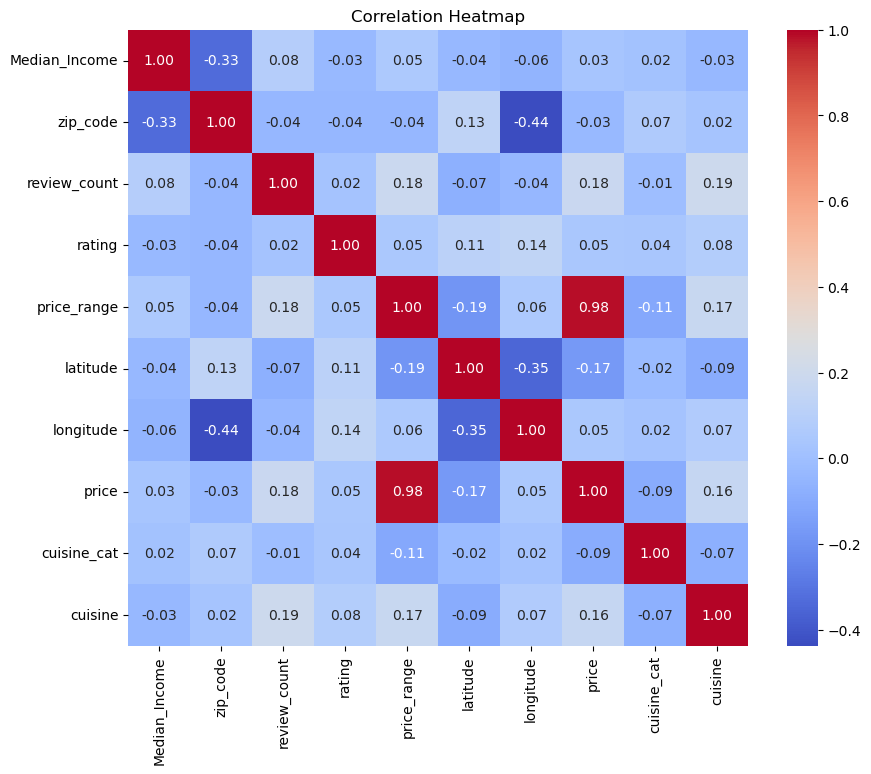

In [336]:
# prints the correlation matrix with features in our data frame 
print(df[['Median_Income', 'zip_code','cuisine', 'review_count', 'rating','price_range','latitude',
          'longitude','price','cuisine_cat'] ].corr())

# this calculate the correlation matrix
corr_matrix = df[['Median_Income', 'zip_code','review_count', 'rating', 'price_range', 'latitude',
                  'longitude', 'price', 'cuisine_cat', 'cuisine']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

From the correalation heat map, we see that there are few variables with strong correlations. Notably, relationships such as Median Income and Zip Code, Longitude and Zip Code, Price and Price Range, as well as Longitude and Latitude show the highest levels of correlation. These correlations suggest potential interactions and dependencies among these features, making them key candidates for further testing in our model. 

In [311]:
# chi-square tests for univariate feature selection 
contingency_table_cuisine_price = pd.crosstab(yelp_zip['Median_Income'], yelp_zip['review_count'])
chi2_cuisine_price, p_cuisine_price, dof_cuisine_price, expected_cuisine_price = chi2_contingency(contingency_table_cuisine_price)
print(f"Chi-square statistic: {chi2_cuisine_price}")
print(f"P-value: {p_cuisine_price}")
print(f"Degrees of freedom: {dof_cuisine_price}")
contingency_table_cuisine_price = pd.crosstab(yelp_zip['review_count'], yelp_zip['price'])
chi2_cuisine_price, p_cuisine_price, dof_cuisine_price, expected_cuisine_price = chi2_contingency(contingency_table_cuisine_price)
print(f"Chi-square statistic: {chi2_cuisine_price}")
print(f"P-value: {p_cuisine_price}")
print(f"Degrees of freedom: {dof_cuisine_price}")
contingency_table_cuisine_price = pd.crosstab(yelp_zip['Median_Income'], yelp_zip['zip_code'])
chi2_cuisine_price, p_cuisine_price, dof_cuisine_price, expected_cuisine_price = chi2_contingency(contingency_table_cuisine_price)
print(f"Chi-square statistic: {chi2_cuisine_price}")
print(f"P-value: {p_cuisine_price}")
print(f"Degrees of freedom: {dof_cuisine_price}")
contingency_table_cuisine_price = pd.crosstab(yelp_zip['zip_code'], yelp_zip['longitude'])
chi2_cuisine_price, p_cuisine_price, dof_cuisine_price, expected_cuisine_price = chi2_contingency(contingency_table_cuisine_price)
print(f"Chi-square statistic: {chi2_cuisine_price}")
print(f"P-value: {p_cuisine_price}")
print(f"Degrees of freedom: {dof_cuisine_price}")
contingency_table_cuisine_price = pd.crosstab(yelp_zip['price_range'], yelp_zip['cuisine_cat'])
chi2_cuisine_price, p_cuisine_price, dof_cuisine_price, expected_cuisine_price = chi2_contingency(contingency_table_cuisine_price)
print(f"Chi-square statistic: {chi2_cuisine_price}")
print(f"P-value: {p_cuisine_price}")
print(f"Degrees of freedom: {dof_cuisine_price}")
contingency_table_cuisine_price = pd.crosstab(yelp_zip['price_range'], yelp_zip['Median_Income'])
chi2_cuisine_price, p_cuisine_price, dof_cuisine_price, expected_cuisine_price = chi2_contingency(contingency_table_cuisine_price)
print(f"Chi-square statistic: {chi2_cuisine_price}")
print(f"P-value: {p_cuisine_price}")
print(f"Degrees of freedom: {dof_cuisine_price}")

Chi-square statistic: 5564.609555166833
P-value: 0.0039036078307648336
Degrees of freedom: 5287
Chi-square statistic: 1156.8362981534542
P-value: 6.748535184123554e-07
Degrees of freedom: 933
Chi-square statistic: 7650.0
P-value: 0.0
Degrees of freedom: 289
Chi-square statistic: 7595.604395604396
P-value: 1.47324882129389e-21
Degrees of freedom: 6460
Chi-square statistic: 88.02282061045996
P-value: 2.175708355558869e-08
Degrees of freedom: 27
Chi-square statistic: 61.665743232730144
P-value: 0.14564560950517155
Degrees of freedom: 51


From the chi-squared tests above, we observe a significant relationship between most of the variables tested, except for Price Range and Median Income. This result indicates that these two variables are independent and do not exhibit a meaningful association. Consequently, incorporating these features in a model against each other is unlikely to contribute valuable insights or improve predictive performance. 

The final feature selection method employed is Recursive Feature Elimination (RFE). This technique has been integrated into several models below to ensure the focus remains on the most important features while minimizing the risk of overfitting. By systematically eliminating less impactful features, RFE helps improve model efficiency and predictive accuracy. We will discuss in detail at the end, certain features that were left out of the model and why. 

# Regression Metrics 

Regression metrics are crucial for evaluating how well a model predicts continuous outcomes. To assess the performance of our models, we split the dataset into a training set (80%) and a test set (20%). This consistent split is applied across all models to maintain fairness.

Decision Tree Regressor:
A decision tree regressor is effective for predicting continuous target variables. The model builds a tree structure by recursively splitting nodes based on feature values until a certain criterion is met. The model outputs a continuous value based on the average of data points within each leaf. Key hyperparameters like max_depth are used to prevent overfitting by limiting the depth of the tree.

KNN Regressor:
The K-Nearest Neighbors (KNN) regressor predicts the target variable by averaging the values of the K nearest data points in the feature space. This approach is effective in capturing local patterns. Key hyperparameters, such as n_neighbors, weights, and metric, help control the influence of neighbors and distance calculations, reducing overfitting by adjusting the model's sensitivity to nearby points.

Random Forest Regressor:
A random forest regressor builds an ensemble of decision trees. Each tree in the forest makes a prediction, and the final output is the average of all the tree predictions, which helps reduce variance and improves accuracy. This model is robust against overfitting due to the random sampling of data and features. Key hyperparameters include max_depth and n_estimators, which control the depth of individual trees and the number of trees in the forest, respectively.


# Decision Tree Regressor

In [420]:
# break the dataset into test and train 
X = df.drop(columns = ['rating', 'name']) # feature 
Y = df['rating'] #target
#test ratio to get the 80-20 train and test set 
test_ratio = 0.2
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=test_ratio,random_state=0)
# this prints the shape. This is a good consistency check 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(360, 9)
(90, 9)
(360,)
(90,)


features selection: Index(['cuisine', 'review_count', 'latitude', 'longitude', 'cuisine_cat'], dtype='object')


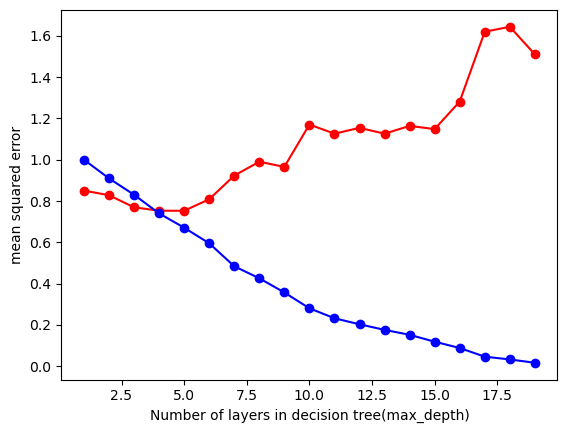

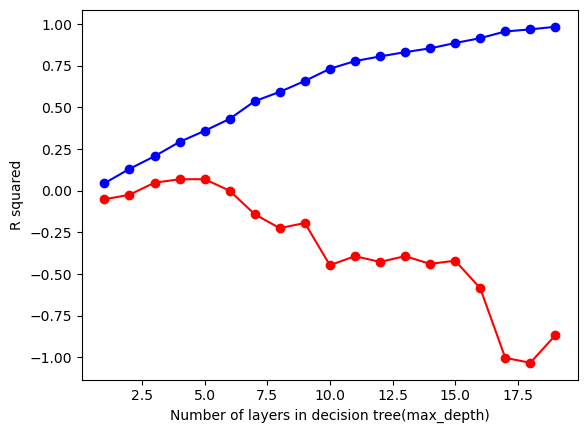

In [421]:
# this trains the decision tree model 
model = DecisionTreeRegressor()
#added RFE for feature selection 
rfe = RFE(model, n_features_to_select=5)
rfe = rfe.fit(x_train,y_train)
rfe_selected = x_train.columns[rfe.support_]
print(f"features selection: {rfe_selected}")
x_train_feature = x_train[rfe_selected]
x_test_feature = x_test[rfe_selected]
#hyper-parameter tuning 
test_results = []
train_results = []
#loops through to find hyper paramters 
for num_layer in range(1,20):
    model = DecisionTreeRegressor(max_depth=num_layer)
    model = model.fit(x_train_feature,y_train)

    yp_train=model.predict(x_train_feature)
    yp_test=model.predict(x_test_feature)

    mse_train = mean_squared_error(y_train,yp_train)
    mse_test = mean_squared_error(y_test,yp_test)
    r2_train = r2_score(y_train,yp_train)
    r2_test = r2_score(y_test,yp_test)

    train_results.append([num_layer,mse_train,r2_train])
    test_results.append([num_layer,mse_test,r2_test])

test_results = np.array(test_results)
train_results = np.array(train_results)
# plots the MSE and R squared 
col = 1
plt.plot(test_results[:,0], test_results[:,col],'-or', label = 'test MSE')
plt.plot(train_results[:,0], train_results[:,col],'-ob', label = 'train MSE')
plt.xlabel('Number of layers in decision tree(max_depth)')
plt.ylabel('mean squared error')
plt.show()
col = 2
plt.plot(test_results[:,0], test_results[:,col],'-or',label = 'test Rsquared')
plt.plot(train_results[:,0], train_results[:,col],'-ob',label = 'train Rsquared')
plt.xlabel('Number of layers in decision tree(max_depth)')
plt.ylabel('R squared')
plt.show()

#choose 4 for both 


From these tests, we can observe that for the Decision Tree Regressor, the optimal max_depth is around 4-5. For Mean Squared Error (MSE), the minimum value of the red line corresponds to max_depth around 4-5, which helps minimize the error. For R-squared, the max_depth should be at the point where the curve flattens (also around 4-5), which indicates the best fit. The key features identified in our dataset include cuisine, review_count, latitude, longitude, and cuisine_cat. These features will be the keys ones used to run the model for prediction.

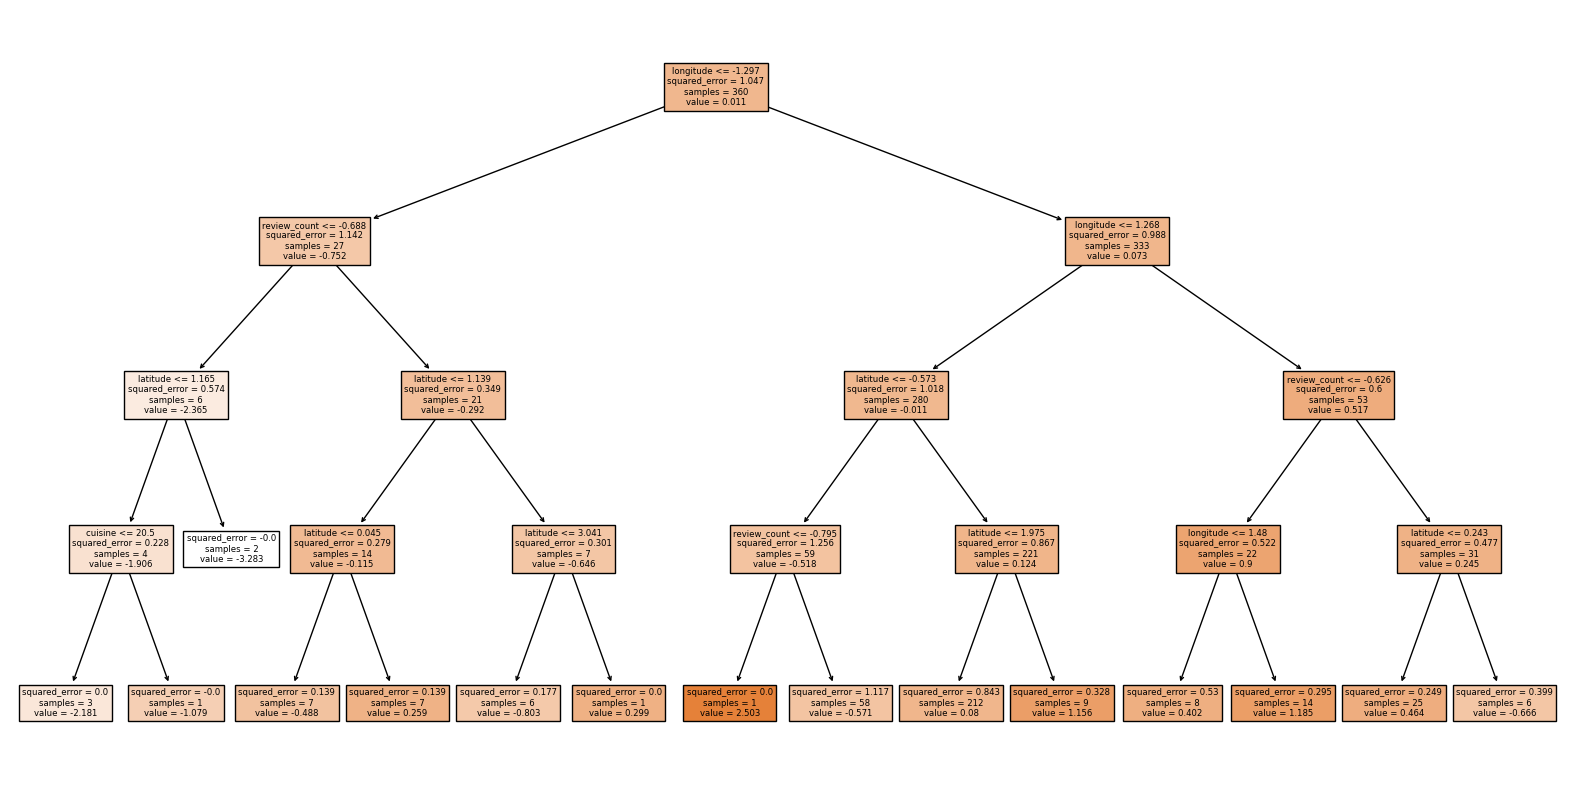

In [381]:
# this trains the decision tree model 
model = DecisionTreeRegressor(max_depth=4)
# fit the model 
model = model.fit(x_train_feature,y_train)
# make the predicitons 
yp_train = model.predict(x_train_feature)
yp_test = model.predict(x_test_feature)
#plot tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True,feature_names=x_train_feature.columns)
plt.show()


In our model, we aim to predict restaurant ratings based on key features in the dataset. The decision tree reveals that the root node splits on longitude and review_count, indicating that these are the most influential features in predicting restaurant ratings. Additionally, latitude, review_count, and cuisine frequently appear in subsequent splits, further emphasizing their importance. This suggests that geographic features like longitude and latitude, along with review_count, are crucial for predicting a restaurant's rating.

# KNN Regressor

In [430]:

X = df[['Median_Income', 'cuisine', 'review_count', 'latitude', 'cuisine_cat']] #features 
Y = df['price_range'] #target 
#test ratio to get the 80-20 train and test set 
test_ratio = 0.2
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=test_ratio,random_state=0)
# this prints the shape. This is a good consistency check 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(360, 5)
(90, 5)
(360,)
(90,)


best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
mean squared error : 0.18628889004910895
r sqaured : 0.00792898790415364


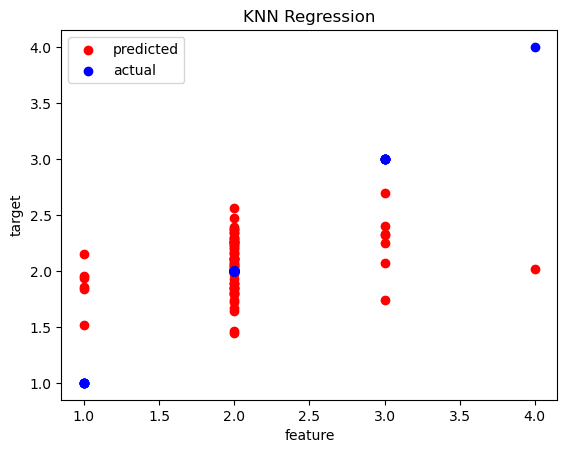

In [431]:
# # scale the features for KNN
#loads the KNN regressor and trains the model
knn = KNeighborsRegressor()
# Define the parameter grid
# this was helped with chatgpt4 use more parameters and use gridsearchcv 
param_grid = {
    'n_neighbors': [ 3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance','uniform'],
    'metric': ['euclidean', 'manhattan']
}
# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
# fit the paramters 
grid_search.fit(x_train,y_train)

best_params = grid_search.best_params_
print(f"best hyperparameters: {best_params}")
#train model using best paramters 
knn = grid_search.best_estimator_
# makes predictions 
y_pred = knn.predict(x_test)

#evaluate the model for testing 
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
#prints the results 
print(f'mean squared error : {mse}')
print(f'r sqaured : {r2}')

#graph the results 
plt.scatter(y_test,y_pred, color = 'red', label = 'predicted') 
plt.scatter(y_test,y_test, color = 'blue', label = 'actual') 
plt.title('KNN Regression')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend()
plt.show()

With the KNN regressor model, we are attempting to predict the influence of price range on key geographical features. Although the model has been fine tuned with hyperparameters, a significant difference remains between the predicted and actual values. This suggests that either the model is not capturing the relationships effectively or that geographical factors may not strongly influence price range. This indicates that additional factors beyond geography may be more important in predicting price range, or that further feature engineering and model refinement are necessary for better accuracy.

# Random Forest Regressor

features selection: Index(['zip_code', 'latitude', 'longitude', 'Median_Income'], dtype='object')


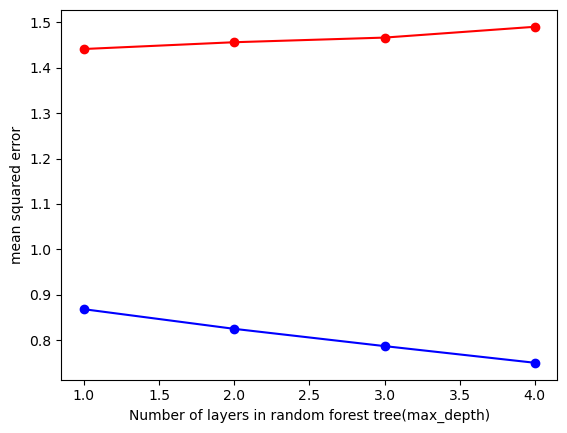

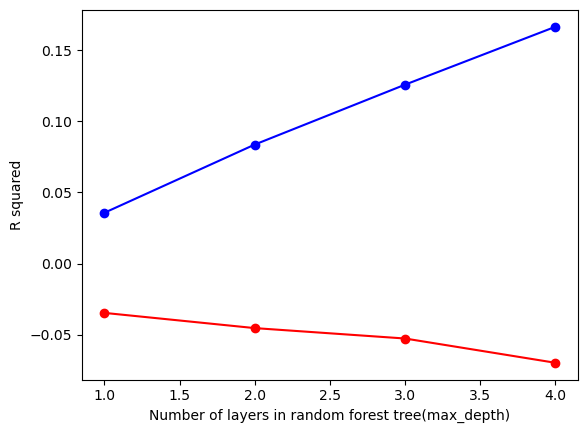

In [410]:
# Define features (X) and target (Y)
X = df[['zip_code', 'latitude', 'longitude', 'Median_Income', 'price_range','price' ,'cuisine_cat']] #features 
Y = df['review_count']
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# this trains the decision tree model 
model = RandomForestRegressor()
#added RFE for feature selection 
rfe = RFE(model, n_features_to_select=5)
rfe = rfe.fit(x_train,y_train)
rfe_selected = x_train.columns[rfe.support_]
print(f"features selection: {rfe_selected}")
x_train_feature = x_train[rfe_selected]
x_test_feature = x_test[rfe_selected]
#hyper-parameter tuning 
test_results = []
train_results = []
# looping to get the best hyper parameters 
for num_layer in range(1,5):
    model = RandomForestRegressor(max_depth=num_layer,min_samples_split=5, min_samples_leaf=5, random_state = 42)
    model = model.fit(x_train_feature,Y_train)

    yp_train=model.predict(x_train_feature)
    yp_test=model.predict(x_test_feature)

    mse_train = mean_squared_error(Y_train,yp_train)
    mse_test = mean_squared_error(Y_test,yp_test)
    r2_train = r2_score(Y_train,yp_train)
    r2_test = r2_score(Y_test,yp_test)

    train_results.append([num_layer,mse_train,r2_train])
    test_results.append([num_layer,mse_test,r2_test])

test_results = np.array(test_results)
train_results = np.array(train_results)
# plot the MSE and R squared 
col = 1
plt.plot(test_results[:,0], test_results[:,col],'-or', label = 'test MSE')
plt.plot(train_results[:,0], train_results[:,col],'-ob', label = 'train MSE')
plt.xlabel('Number of layers in random forest tree(max_depth)')
plt.ylabel('mean squared error')
plt.show()

col = 2
plt.plot(test_results[:,0], test_results[:,col],'-or',label = 'test Rsquared')
plt.plot(train_results[:,0], train_results[:,col],'-ob',label = 'train Rsquared')
plt.xlabel('Number of layers in random forest tree(max_depth)')
plt.ylabel('R squared')
plt.show()

Based on the MSE and R-squared values, there appears to be significant noise in the model's predictions. To address this, the max-depth has been constrained to a range of 1 to 5. After testing within this range, a max-depth of 3 was selected, as it showed the least variation in the testing data. This decision helps balance model complexity and generalization, reducing overfitting while still capturing the underlying patterns in the data.

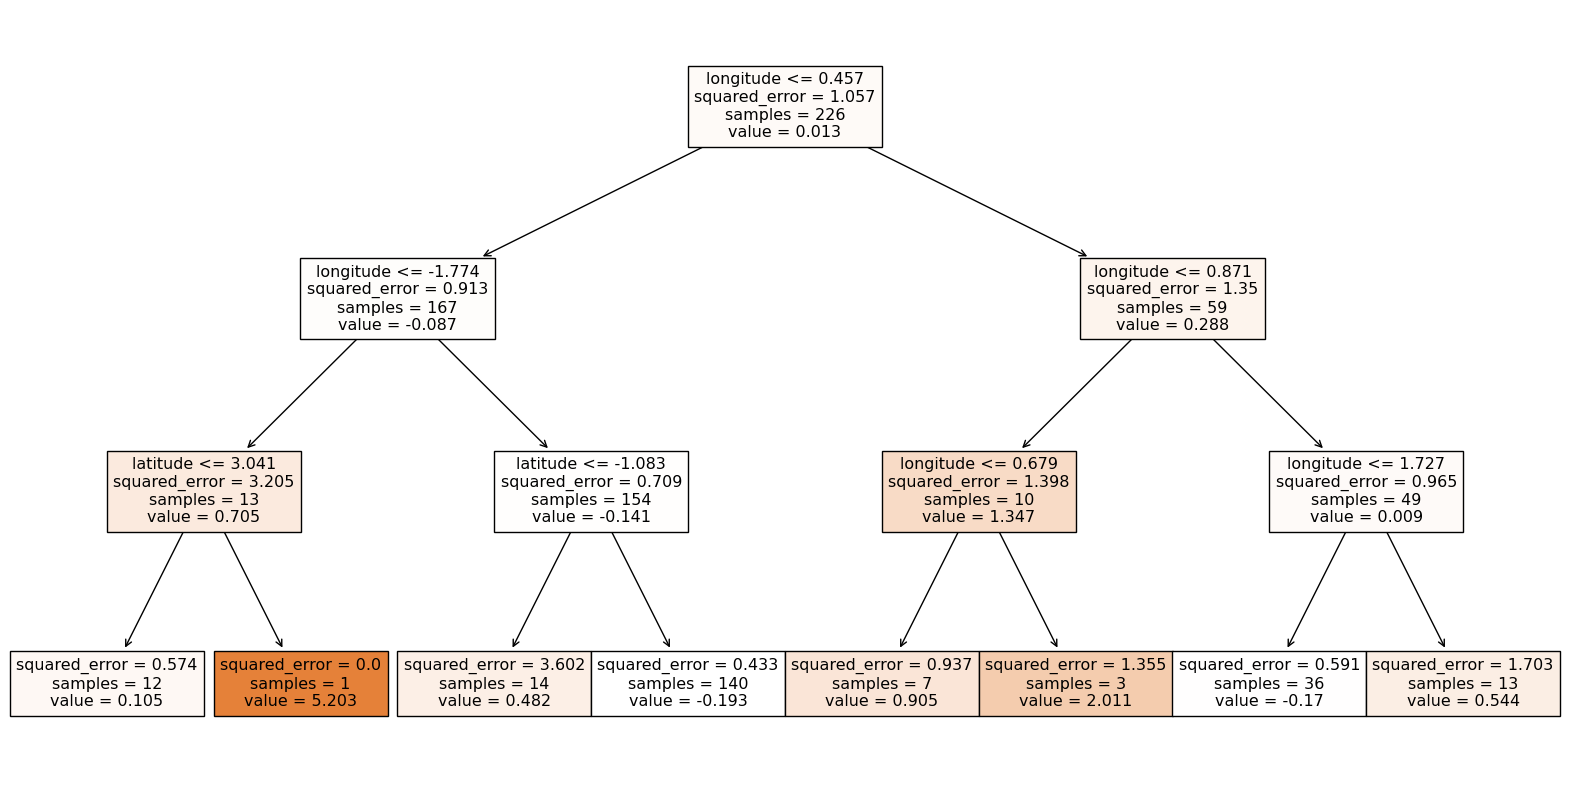

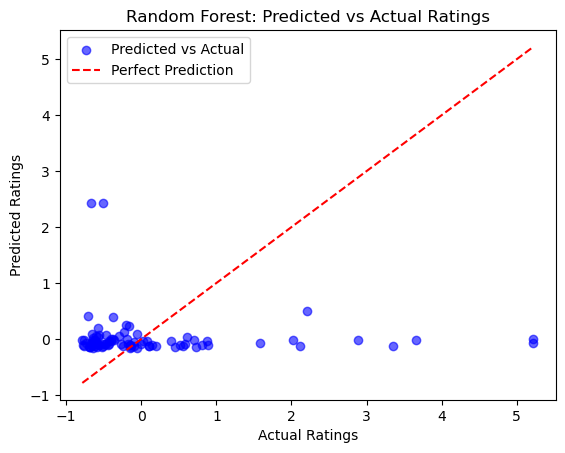

In [415]:
# initalize the model 
model = RandomForestRegressor(max_depth=3, random_state=42)
# fit the model 
model = model.fit(x_train_feature,Y_train)
yp_train = model.predict(x_train_feature)
yp_test = model.predict(x_test_feature)

# Plot the first tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], filled=True, feature_names=x_train_feature.columns)
plt.show()
# Plot actual vs predicted ratings
# this code is helped with chaptpgt4
plt.scatter(Y_test, yp_test, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Random Forest: Predicted vs Actual Ratings')
plt.legend()
plt.show()

This Random Forest Regressor model was designed to predict how certain features influence the review count of restaurants. However, the model experienced overfitting, as indicated by high R-squared error, leading to an overly complex tree. To address this, we set the max-depth to a range of 1 to 5 to reduce complexity and introduced a min_samples_split of 5 to avoid unnecessary splits. Upon examining the first decision tree in the forest, we observe that longitude is the root node, highlighting its importance along with latitude in predicting review counts. Despite these adjustments, the model's performance is still suboptimal, as shown by the graph, suggesting that there may be other factors at play or that the geographical features alone may not be sufficient for accurate predictions.

# Comparison 

Among the three regression models, the Decision Tree Regressor produced the most meaningful results, predicting restaurant ratings. After feature selection and hyperparameter tuning, the model's accuracy improved. In contrast, while the KNN Regressor showed some improvement with hyperparameter tuning, the predicted values did not align with the actual values, suggesting that this model might not be capturing the underlying patterns well. The Random Forest Regressor, encountered issues with overfitting, possibly due to a lack of key features or insufficient hyperparameter tuning. These challenges suggest that while Random Forest could work well with more adjustments, the Decision Tree Regressor remains the most reliable model for this particular task. 

# Multiclass classification

We split our dataset into a training set and a test set to evaluate the performance of our model. For consistency, the data is divided with 80% used for training and 20% reserved for testing. This train-test split has been applied across all multiclass classification models in the section. 

Random Forest Classifier: It is a model that constructs a forrest of decision trees, where each tree is trained on the data. Each individual tree makes a prediction, and the output is determined by a majority vote across all the trees. Inputs are the features and targets and the output is the predicited class labels. Key parameters include n_estimators and max_depth.  

# Random Forest Classifier

Accuracy: 0.7111111111111111
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.38      0.38      0.38         8
           2       0.74      0.83      0.78        24
           3       1.00      0.33      0.50         3
           4       0.81      0.93      0.86        27
           5       0.00      0.00      0.00         4
           6       0.62      0.71      0.67         7
           7       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1

    accuracy                           0.71        90
   macro avg       0.51      0.44      0.45        90
weighted avg       0.70      0.71      0.70        90



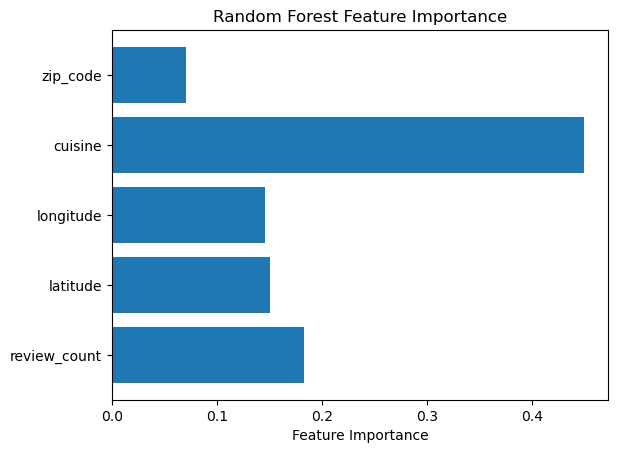

In [364]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
# Suppress the UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Prepare feature matrix X and target vector y
# feature 
X = df[['Median_Income', 'review_count', 'price', 'latitude', 'longitude', 'price_range', 'cuisine','zip_code']]
# target 
y = df['cuisine_cat']

# Split the dataset into training and testing sets on the 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply RFE for feature selection
rf = RandomForestClassifier(n_estimators=100, max_depth=17,random_state=42)
rfe = RFE(rf, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)
rfe_selected = X_train.columns[rfe.support_]

# Train the model using only selected features
rf.fit(X_train[rfe_selected], y_train)

# Make predictions on the test set using only selected features
y_pred = rf.predict(X_test[rfe_selected])

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot feature importances for the selected features
feature_importances = rf.feature_importances_
plt.barh(rfe_selected, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

Our model aims to predict the cuisine category of a restaurant using features such as zip code, cuisine type, longitude, latitude, and review count. After applying Recursive Feature Elimination (RFE), these key features were identified as the most significant predictors. With an accuracy of 71%, the model demonstrates a reasonable ability to predict the cuisine category. However, there's still room for improvement, particularly in addressing class imbalances and refining feature selection. The F1 macro average score of 0.45 suggests that the model struggles with balancing performance across different classes, highlighting the need for further tuning to improve its classification across all categories. 

Accuracy: 0.9777777777777777
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        68
           3       0.89      1.00      0.94        17
           4       0.00      0.00      0.00         2

    accuracy                           0.98        90
   macro avg       0.72      0.75      0.74        90
weighted avg       0.96      0.98      0.97        90



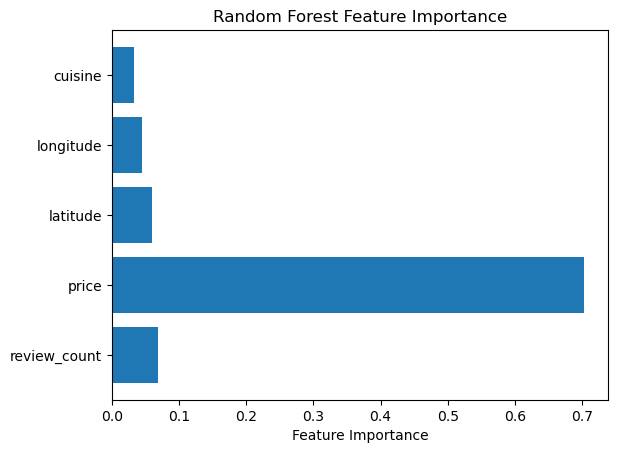

In [361]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
# Suppress the UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
# features 
X = df[['Median_Income', 'review_count', 'price', 'latitude', 'longitude', 'cuisine_cat', 'cuisine', 'rating']]
# target 
y = df['price_range']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)
rfe_selected = X_train.columns[rfe.support_]

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot feature importances for the selected features
feature_importances = rf.feature_importances_
plt.barh(rfe_selected, feature_importances[rfe.support_])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

Our model is tasked with predicting the price range of a restaurant based on various features in the dataset. After applying Recursive Feature Elimination (RFE), we identified key features such as cuisine, longitude, latitude, price, and review count. With an accuracy of 97%, the model performs very well in predicting the price range. We can also see high precision and recall and f1 scores, which is good for our model.  Notably, price itself appears to be a major feature driving the predictions. To assess its true importance, let's explore what happens when we remove the price feature from the dataset and evaluate the model's performance again.

Accuracy: 0.6888888888888889
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.76      0.87      0.81        68
           3       0.75      0.18      0.29        17
           4       0.00      0.00      0.00         2

    accuracy                           0.69        90
   macro avg       0.38      0.26      0.27        90
weighted avg       0.71      0.69      0.66        90



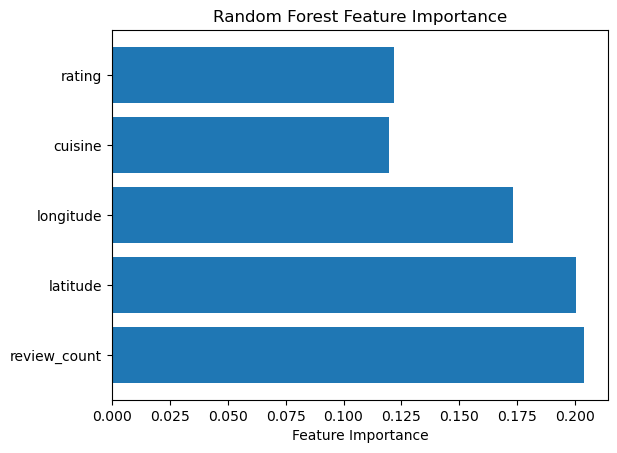

In [360]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
# Suppress the UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
# Step 2: Prepare feature matrix X and target vector y
X = df[['Median_Income', 'review_count', 'latitude', 'longitude', 'cuisine_cat', 'cuisine', 'rating']]
y = df['price_range']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)
rfe_selected = X_train.columns[rfe.support_]

# Step 5: Train the model
rf.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = rf.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot feature importances for the selected features
feature_importances = rf.feature_importances_
plt.barh(rfe_selected, feature_importances[rfe.support_])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

By removing the "price" feature from the model, we observe a drop in accuracy to 68%. Initially, the "price" feature seemed to be quite similar to the "price range" feature, leading us to exclude it. While the model performed well with the "price" feature, its removal resulted in a noticeable decline in performance. This highlights the potential risk of multicollinearity, which can undermine its ability to effectively learn from the data. After carefully selecting the remaining key features, the model now achieves an accuracy of 67% in predicting the price range based on the chosen variables, we can also see a low f1 macro avg score 0.27, which shows imbalances across different classes. 

# Binary class classification 

We split our dataset into a training set and a test set to evaluate the performance of our model. For consistency, the data is divided with 80% used for training and 20% reserved for testing. This train-test split has been applied across all Binary classification models in the section. 

Logistic Regression models the relationship between features and a binary target by estimating the probability of each class. It uses a weighted sum of features passed through a sigmoid function to generate a probability between 0 and 1. The input consists of numerical or categorical features and a binary target, while the output is the predicted probability. A key hyperparameter is max_iter, which controls the maximum number of iterations for model convergence.

# Logistics Regression

count    4.500000e+02
mean     1.527667e-15
std      1.001113e+00
min     -3.283301e+00
25%     -5.278265e-01
50%      2.326845e-02
75%      5.743634e-01
max      2.503196e+00
Name: rating, dtype: float64
features selection: Index(['Median_Income', 'latitude', 'longitude'], dtype='object')
Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.29      0.43        34
           1       0.69      0.95      0.80        56

    accuracy                           0.70        90
   macro avg       0.73      0.62      0.61        90
weighted avg       0.72      0.70      0.66        90



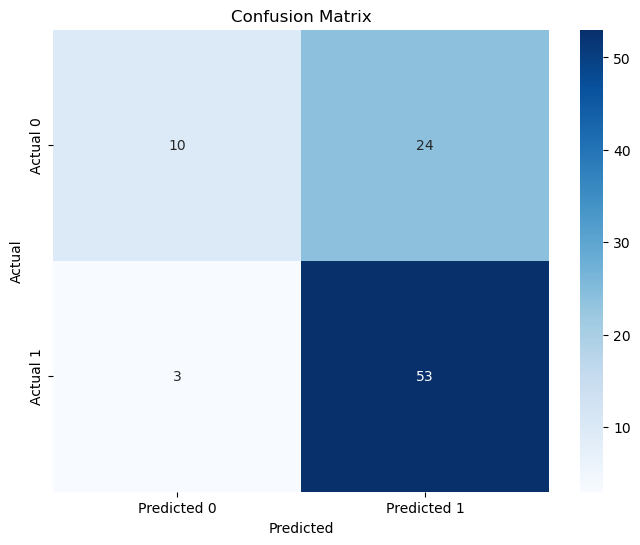

In [356]:
# Existing code
summary = df['rating'].describe()
print(summary)
# median sets the threshold
threshold = 2.326845e-02
# creates a binary columns 
df['rating_binary'] = df['rating'].apply(lambda x: 1 if x > threshold else 0)
# feature 
x = df[['Median_Income', 'review_count', 'latitude', 'longitude', 'cuisine_cat', 'cuisine']]
# target
y = df['rating_binary']
# initalizes the model 
model = LogisticRegression(max_iter=200)
# feature selection 
rfe = RFE(model, n_features_to_select=3) 
rfe = rfe.fit(x, y)
features = x.columns[rfe.support_]
x_features = x[features]
print(f"features selection: {features}")
# breaks the model to test and train 
x_train, x_test, y_train, y_test = train_test_split(x_features, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# print accuracy and get precision, recall, and f1 score 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model is attempting to predict restaurant rating, high vs low rating. After performing Recursive Feature Elimination (RFE), the key features selected for prediction are median income, latitude, and longitude, with an overall accuracy of 70%. The model performs well for predicting high ratings, with a precision of 0.69 and a recall of 0.95. However, the model struggles with predicting restaurants with lower ratings, as evidenced by a precision of 0.77 and recall of 0.29. This indicates that many restaurants with lower ratings are being misclassified as having high rating, highlighting an imbalance in the predictions.

count    4.500000e+02
mean    -3.947460e-18
std      1.001113e+00
min     -8.021824e-01
25%     -6.109505e-01
50%     -3.731365e-01
75%      1.731820e-01
max      5.640862e+00
Name: review_count, dtype: float64
features selection: Index(['Median_Income', 'longitude', 'price_range'], dtype='object')
Accuracy: 0.5111111111111111
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.35      0.42        46
           1       0.50      0.68      0.58        44

    accuracy                           0.51        90
   macro avg       0.52      0.51      0.50        90
weighted avg       0.52      0.51      0.50        90



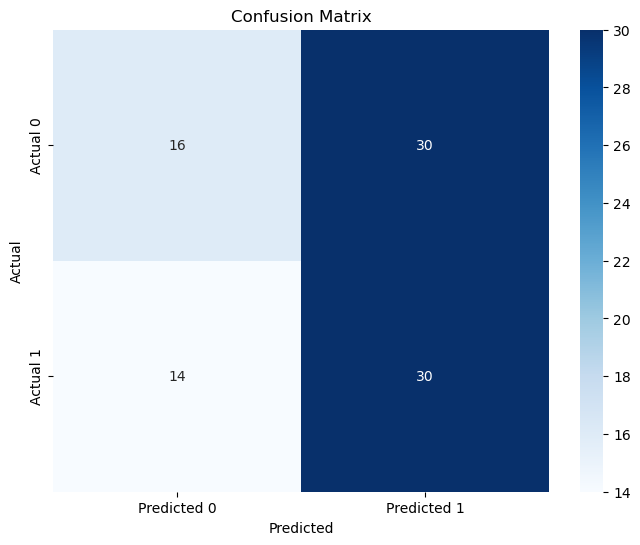

In [357]:
# summary stat
summary = df['review_count'].describe()
print(summary)
# median sets threshold 
df['high_review_count'] = df['review_count'].apply(lambda x: 1 if x >= -3.731365e-01 else 0)
# feature 
x = df[['Median_Income', 'zip_code', 'latitude', 'longitude', 'cuisine_cat' ,'price', 'price_range']]
# target
y = df['high_review_count']
# initalizes the model 
model = LogisticRegression(max_iter=200)
# feature selection 
rfe = RFE(model, n_features_to_select=3) 
rfe = rfe.fit(x, y)
features = x.columns[rfe.support_]
x_features = x[features]
print(f"features selection: {features}")
# breaks data frame for test and train 
x_train, x_test, y_train, y_test = train_test_split(x_features, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# print accuracy and precision and recall and f1 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model is predicting restaurant popularity based on high review counts. After performing Recursive Feature Elimination (RFE), the key features selected are median income, price range, and longitude, achieving an accuracy of 51%. The model shows some success in identifying high review counts, with a precision of 0.50 and recall of 0.68 for class 1. However, it struggles with predicting lower review counts, where the precision is 0.53 and recall is 0.35 for class 0. This indicates a significant misclassification of restaurants with lower review counts, revealing an imbalance in the predictions.

# Conclusion 

From our feature selection process, we focused on key variables identified through univariate testing using the Chi-squared test and Recursive Feature Elimination (RFE). These methods helped us ensure we only included the most impactful features, minimizing the risk of overfitting. Key features that consistently emerged were median income, latitude, longitude, review count, price range, and cuisine type. By adding these key features into our models, we aimed to build a more reliable model.

Regarding the regression models, for the decision tree, we found that geographic features like longitude and latitude, along with review count, played a significant role in predicting a restaurant's rating. However, the KNN model showed that price range had little to no effect on geographic features such as location or income, indicating a difference in how the models interpret the relationships between variables.

In multiclass classification, we used a Random Forest Classifier to predict the cuisine category, achieving an accuracy of 71%. However, the precision, recall, and F1 scores were low, indicating that the model struggles with class imbalance or  feature representation. For binary classification, predicting restaurant success based on high or low review counts, we saw a more promising result with an accuracy of 70%, though the precision, recall, and F1 scores were still moderate.

Overall, the results suggest that while certain features, such as latitude, longitude, and review count, are valuable predictors, overfitting and low performance in some metrics indicate that the models are not fully capturing all the factors that influence restaurant performance. This could suggest that there are additional, unaccounted-for variables that are important in building a successful restaurant model, highlighting the complexity of restaurant predictions. 